# Project Pattern Mining

In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fim import apriori

In [324]:
df = pd.read_csv("train_2217.csv")


In [325]:
column2drop = ["name", "artists", "album_name", "time_signature", "key", "mode", "explicit", "n_beats", "n_bars", "processing", "features_duration_ms", "popularity"]
df.drop(column2drop, axis=1, inplace=True)

In [326]:
df.head()

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity_confidence,genre
0,269800,0.523,0.585,-5.607,0.0765,0.06640,0.001270,0.1170,0.385,140.880,0.469,bluegrass
1,210306,0.631,0.925,-5.591,0.0761,0.62700,0.000004,0.4930,0.799,124.061,0.690,happy
2,288760,0.591,0.177,-17.299,0.0811,0.92600,0.001060,0.2940,0.522,70.959,0.353,bluegrass
3,323928,0.593,0.588,-14.420,0.0430,0.00315,0.124000,0.0639,0.328,169.857,0.525,happy
4,256093,0.301,0.456,-6.606,0.0259,0.34000,0.000002,0.2050,0.193,74.590,0.786,iranian


In [327]:
"""
bins = [0, 50, 100]  # Define the bin edges
labels_cut = ['LOW_POP', 'HIGH_POP']

"""


"\nbins = [0, 50, 100]  # Define the bin edges\nlabels_cut = ['LOW_POP', 'HIGH_POP']\n\n"

In [328]:

labels = ["LOW", "MID", "HIGH"]
colonne = ["duration_ms", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "popularity_confidence"]
for colonna in colonne:
    if colonna == "popularity_confidence":

      labels_pc = ["LOW_POP_CONF", "MID_POP_CONF", "HIGH_POP_CONF"]
      df[(f"{colonna}_bin")] = pd.qcut(df[str(colonna)], 3, labels= labels_pc)
      df[(colonna)] = pd.qcut(df[str(colonna)], 3)
      df[(f"{colonna}_bin")] = df[f"{colonna}_bin"].astype(str) + " " + df[(colonna)].astype(str)
      df.drop([colonna], axis=1, inplace=True)


    else:
      df[(f"{colonna}_bin")] = pd.qcut(df[str(colonna)], 3, labels= labels)
      df[f"{colonna}_bin"] = df[f"{colonna}_bin"].astype(str) + f"_{colonna[: 4].upper()}"
      df[(colonna)] = pd.qcut(df[str(colonna)], 3)
      df[(f"{colonna}_bin")] = df[f"{colonna}_bin"].astype(str) + " " + df[(colonna)].astype(str)
      df.drop([colonna], axis=1, inplace=True)

"""
df["popularity_bin"] = pd.qcut(df["popularity"], 2, duplicates='drop', labels = labels_cut)
df["popularity"] = pd.qcut(df["popularity"], 2)
df[("popularity_bin")] = df["popularity_bin"].astype(str) + " " + df["popularity"].astype(str)
"""

df

,genre,duration_ms_bin,danceability_bin,energy_bin,loudness_bin,speechiness_bin,acousticness_bin,instrumentalness_bin,liveness_bin,valence_bin,tempo_bin,popularity_confidence_bin
0,bluegrass,"HIGH_DURA (266593.667, 1149106.0]","MID_DANC (0.504, 0.658]","MID_ENER (0.557, 0.829]","HIGH_LOUD (-5.856, 0.643]","HIGH_SPEE (0.0687, 0.901]","MID_ACOU (0.0372, 0.409]","MID_INST (1.27e-05, 0.341]","MID_LIVE (0.108, 0.204]","MID_VALE (0.293, 0.575]","HIGH_TEMP (134.948, 220.525]","MID_POP_CONF (0.318, 0.656]"
1,happy,"MID_DURA (196612.667, 266593.667]","MID_DANC (0.504, 0.658]","HIGH_ENER (0.829, 1.0]","HIGH_LOUD (-5.856, 0.643]","HIGH_SPEE (0.0687, 0.901]","HIGH_ACOU (0.409, 0.996]","LOW_INST (-0.001, 1.27e-05]","HIGH_LIVE (0.204, 0.994]","HIGH_VALE (0.575, 0.995]","MID_TEMP (109.759, 134.948]","HIGH_POP_CONF (0.656, 1.0]"
2,bluegrass,"HIGH_DURA (266593.667, 1149106.0]","MID_DANC (0.504, 0.658]","LOW_ENER (-0.0009799000000000001, 0.557]","LOW_LOUD (-39.693999999999996, -9.064]","HIGH_SPEE (0.0687, 0.901]","HIGH_ACOU (0.409, 0.996]","MID_INST (1.27e-05, 0.341]","HIGH_LIVE (0.204, 0.994]","MID_VALE (0.293, 0.575]","LOW_TEMP (-0.001, 109.759]","MID_POP_CONF (0.318, 0.656]"
3,happy,"HIGH_DURA (266593.667, 1149106.0]","MID_DANC (0.504, 0.658]","MID_ENER (0.557, 0.829]","LOW_LOUD (-39.693999999999996, -9.064]","MID_SPEE (0.0406, 0.0687]","LOW_ACOU (-0.001, 0.0372]","MID_INST (1.27e-05, 0.341]","LOW_LIVE (0.0168, 0.108]","MID_VALE (0.293, 0.575]","HIGH_TEMP (134.948, 220.525]","MID_POP_CONF (0.318, 0.656]"
4,iranian,"MID_DURA (196612.667, 266593.667]","LOW_DANC (-0.001, 0.504]","LOW_ENER (-0.0009799000000000001, 0.557]","MID_LOUD (-9.064, -5.856]","LOW_SPEE (-0.001, 0.0406]","MID_ACOU (0.0372, 0.409]","LOW_INST (-0.001, 1.27e-05]","HIGH_LIVE (0.204, 0.994]","LOW_VALE (-0.001, 0.293]","LOW_TEMP (-0.001, 109.759]","HIGH_POP_CONF (0.656, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
2212,study,"LOW_DURA (34109.999, 196612.667]","HIGH_DANC (0.658, 0.97]","LOW_ENER (-0.0009799000000000001, 0.557]","LOW_LOUD (-39.693999999999996, -9.064]","HIGH_SPEE (0.0687, 0.901]","HIGH_ACOU (0.409, 0.996]","MID_INST (1.27e-05, 0.341]","LOW_LIVE (0.0168, 0.108]","MID_VALE (0.293, 0.575]","HIGH_TEMP (134.948, 220.525]","MID_POP_CONF (0.318, 0.656]"
2213,brazil,"MID_DURA (196612.667, 266593.667]","MID_DANC (0.504, 0.658]","MID_ENER (0.557, 0.829]","HIGH_LOUD (-5.856, 0.643]","LOW_SPEE (-0.001, 0.0406]","MID_ACOU (0.0372, 0.409]","LOW_INST (-0.001, 1.27e-05]","LOW_LIVE (0.0168, 0.108]","HIGH_VALE (0.575, 0.995]","MID_TEMP (109.759, 134.948]","HIGH_POP_CONF (0.656, 1.0]"
2214,iranian,"HIGH_DURA (266593.667, 1149106.0]","LOW_DANC (-0.001, 0.504]","LOW_ENER (-0.0009799000000000001, 0.557]","LOW_LOUD (-39.693999999999996, -9.064]","HIGH_SPEE (0.0687, 0.901]","HIGH_ACOU (0.409, 0.996]","HIGH_INST (0.341, 1.0]","LOW_LIVE (0.0168, 0.108]","LOW_VALE (-0.001, 0.293]","LOW_TEMP (-0.001, 109.759]","LOW_POP_CONF (-0.001, 0.318]"
2215,indian,"HIGH_DURA (266593.667, 1149106.0]","MID_DANC (0.504, 0.658]","MID_ENER (0.557, 0.829]","MID_LOUD (-9.064, -5.856]","LOW_SPEE (-0.001, 0.0406]","HIGH_ACOU (0.409, 0.996]","MID_INST (1.27e-05, 0.341]","MID_LIVE (0.108, 0.204]","MID_VALE (0.293, 0.575]","MID_TEMP (109.759, 134.948]","MID_POP_CONF (0.318, 0.656]"


In [329]:
X = df.values.tolist()


# APRIORI

In [330]:
help(apriori)

# frequent itemset >= min_supp
# closed: an itemset is closed if none of its immediate supersets has the same support as the itemset
# maximal: an itemset is maximal frequent if none of its immediate supersets is frequent

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

### Frequent Itemset

In [331]:
# supp = 2  # 2%
supp = 9  # 20%
zmin = 4 # minimum number of items per item set

In [332]:


itemsets = apriori(X, target="s", supp=supp, zmin=zmin, report="S")
df_freq_it = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

# df_freq_it.to_csv('df_freq_it.csv')

df_freq_it

,frequent_itemset,support
0,"(HIGH_INST (0.341, 1.0], LOW_VALE (-0.001, 0.2...",9.427154
1,"(HIGH_INST (0.341, 1.0], LOW_VALE (-0.001, 0.2...",9.697790
2,"(HIGH_INST (0.341, 1.0], LOW_LOUD (-39.6939999...",9.742896
3,"(LOW_VALE (-0.001, 0.293], LOW_LOUD (-39.69399...",10.329274
4,"(LOW_VALE (-0.001, 0.293], LOW_LOUD (-39.69399...",10.329274
5,"(LOW_VALE (-0.001, 0.293], HIGH_ACOU (0.409, 0...",9.382048
6,"(LOW_TEMP (-0.001, 109.759], LOW_LOUD (-39.693...",9.517366
7,"(LOW_LOUD (-39.693999999999996, -9.064], HIGH_...",10.464592


### Closed Itemsets

In [333]:

itemsets = apriori(X, target="c", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["closed_itemset", "support"])

,closed_itemset,support
0,"(HIGH_INST (0.341, 1.0], LOW_VALE (-0.001, 0.2...",9.427154
1,"(HIGH_INST (0.341, 1.0], LOW_VALE (-0.001, 0.2...",9.697790
2,"(HIGH_INST (0.341, 1.0], LOW_LOUD (-39.6939999...",9.742896
3,"(LOW_VALE (-0.001, 0.293], LOW_LOUD (-39.69399...",10.329274
4,"(LOW_VALE (-0.001, 0.293], LOW_LOUD (-39.69399...",10.329274
5,"(LOW_VALE (-0.001, 0.293], HIGH_ACOU (0.409, 0...",9.382048
6,"(LOW_TEMP (-0.001, 109.759], LOW_LOUD (-39.693...",9.517366
7,"(LOW_LOUD (-39.693999999999996, -9.064], HIGH_...",10.464592


### Maximal Itemsets

In [334]:
itemsets = apriori(X, target="m", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])

,maximal_itemset,support
0,"(HIGH_INST (0.341, 1.0], LOW_VALE (-0.001, 0.2...",9.427154
1,"(HIGH_INST (0.341, 1.0], LOW_VALE (-0.001, 0.2...",9.697790
2,"(HIGH_INST (0.341, 1.0], LOW_LOUD (-39.6939999...",9.742896
3,"(LOW_VALE (-0.001, 0.293], LOW_LOUD (-39.69399...",10.329274
4,"(LOW_VALE (-0.001, 0.293], LOW_LOUD (-39.69399...",10.329274
5,"(LOW_VALE (-0.001, 0.293], HIGH_ACOU (0.409, 0...",9.382048
6,"(LOW_TEMP (-0.001, 109.759], LOW_LOUD (-39.693...",9.517366
7,"(LOW_LOUD (-39.693999999999996, -9.064], HIGH_...",10.464592


### Support plots

#### Support vs number of itemsets

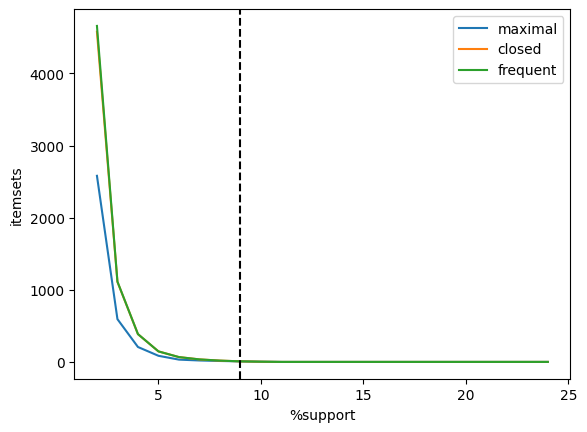

In [335]:

len_max_it = []
len_cl_it = []
len_freq_it = []
max_supp = 25
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    cl_itemsets = apriori(X, target="c", supp=i, zmin=zmin)
    freq_itemsets = apriori(X, target="s", supp=i, zmin=zmin, report="S")
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))
    len_freq_it.append(len(freq_itemsets))

plt.plot(np.arange(2, max_supp), len_max_it, label="maximal")
plt.plot(np.arange(2, max_supp), len_cl_it, label="closed")
plt.plot(np.arange(2, max_supp), len_freq_it, label="frequent")
plt.legend()
plt.xlabel("%support")
plt.ylabel("itemsets")

# Determine the elbow point for SSE (you might have your own method to find this)
elbow_point = supp  # Replace this with the identified elbow point

# Plot a vertical line at the elbow point for SSE in the first plot
plt.axvline(x=elbow_point, color='black', linestyle='--', label=f'Elbow Point: {elbow_point}')

plt.show()


## Rules

In [336]:
supp = 10
conf = 40
zmin = 3

In [337]:

len_r = []
min_sup = 10
max_sup = 30
min_conf = 50
max_conf = 90
for i in range(min_sup, max_sup + 1, 5):  # support
    len_r_wrt_i = []
    for j in range(min_conf, max_conf + 1, 10):  # confidence
        rules = apriori(X, target="r", supp=i, zmin=zmin, conf=j, report="aScl")
        len_r_wrt_i.append(len(rules))  # study your characteristics/properties here

    len_r.append(len_r_wrt_i)
len_r = np.array(len_r)


In [338]:
df_conf_supp = pd.DataFrame(len_r, columns=[50, 60, 70, 80, 90], index=[10, 15, 20, 25, 30])

df_conf_supp


,50,60,70,80,90
10,795,307,139,39,7
15,122,49,31,8,1
20,16,2,2,0,0
25,0,0,0,0,0
30,0,0,0,0,0


In [339]:
# df_conf_supp.to_csv('df_conf_supp.csv')

In [340]:

rules = apriori(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
rules_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)
rules_df.sort_values(by="lift", axis=0, ascending=False)

,consequent,antecedent,abs_support,%_support,confidence,lift
1879,"LOW_ENER (-0.0009799000000000001, 0.557]","(LOW_LOUD (-39.693999999999996, -9.064], HIGH_...",232,10.464592,0.939271,2.810208
1869,"LOW_ENER (-0.0009799000000000001, 0.557]","(LOW_LOUD (-39.693999999999996, -9.064], HIGH_...",229,10.329274,0.938525,2.807974
1677,"LOW_ENER (-0.0009799000000000001, 0.557]","(LOW_TEMP (-0.001, 109.759], LOW_LOUD (-39.693...",211,9.517366,0.925439,2.768822
1890,"LOW_ENER (-0.0009799000000000001, 0.557]","(LOW_LOUD (-39.693999999999996, -9.064], HIGH_...",400,18.042400,0.921659,2.757514
1363,"LOW_ENER (-0.0009799000000000001, 0.557]","(HIGH_INST (0.341, 1.0], LOW_LOUD (-39.6939999...",216,9.742896,0.919149,2.750004
...,...,...,...,...,...,...
1616,"LOW_SPEE (-0.001, 0.0406]","(MID_ACOU (0.0372, 0.409], MID_DANC (0.504, 0....",101,4.555706,0.400794,1.194300
1848,"LOW_SPEE (-0.001, 0.0406]","(LOW_LOUD (-39.693999999999996, -9.064], LOW_P...",105,4.736130,0.400763,1.194210
2003,"LOW_LIVE (0.0168, 0.108]","(HIGH_POP_CONF (0.656, 1.0], MID_ENER (0.557, ...",96,4.330176,0.401674,1.193714
1305,"LOW_LIVE (0.0168, 0.108]","(HIGH_DANC (0.658, 0.97], MID_VALE (0.293, 0.5...",98,4.420388,0.401639,1.193612


In [341]:
#rules_df.to_csv('rules_df.csv')

### Classification

In [342]:
rules_high_pop_conf = rules_df[(rules_df["consequent"] == "HIGH_POP_CONF (0.656, 1.0]")]

rules_high_pop_conf

,consequent,antecedent,abs_support,%_support,confidence,lift
193,"HIGH_POP_CONF (0.656, 1.0]","(HIGH_ENER (0.829, 1.0], HIGH_LIVE (0.204, 0.9...",99,4.465494,0.407407,1.222222
272,"HIGH_POP_CONF (0.656, 1.0]","(HIGH_ENER (0.829, 1.0], HIGH_LOUD (-5.856, 0....",114,5.142084,0.425373,1.276119
370,"HIGH_POP_CONF (0.656, 1.0]","(HIGH_ENER (0.829, 1.0], MID_DANC (0.504, 0.658])",102,4.600812,0.408000,1.224000
483,"HIGH_POP_CONF (0.656, 1.0]","(HIGH_LIVE (0.204, 0.994], HIGH_SPEE (0.0687, ...",124,5.593144,0.423208,1.269625
830,"HIGH_POP_CONF (0.656, 1.0]","(MID_INST (1.27e-05, 0.341], HIGH_DURA (266593...",101,4.555706,0.413934,1.241803
936,"HIGH_POP_CONF (0.656, 1.0]","(HIGH_LOUD (-5.856, 0.643], HIGH_SPEE (0.0687,...",140,6.314840,0.408163,1.224490
1985,"HIGH_POP_CONF (0.656, 1.0]","(MID_TEMP (109.759, 134.948], LOW_INST (-0.001...",96,4.330176,0.406780,1.220339


In [343]:
rules_high_pop_conf.to_csv("rules_high_pop_conf.csv" , index = False)

In [ ]:
from matplotlib import pyplot as plt
rules_high_pop_conf['lift'].plot(kind='hist', bins=20, title='lift high popularity', color = "red")
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
rules_high_pop_conf['confidence'].plot(kind='hist', bins=20, title='confidence high popularity', color = "green")
plt.gca().spines[['top', 'right',]].set_visible(False)

In [346]:
rules_mid_pop_conf = rules_df[rules_df["consequent"] == "MID_POP_CONF (0.318, 0.656]"]
rules_mid_pop_conf

,consequent,antecedent,abs_support,%_support,confidence,lift
1125,"MID_POP_CONF (0.318, 0.656]","(HIGH_VALE (0.575, 0.995], HIGH_TEMP (134.948,...",104,4.691024,0.403101,1.209302


In [347]:
rules_mid_pop_conf.to_csv("rules_mid_pop_conf.csv" , index = False)

In [348]:
rules_low_pop_conf = rules_df[rules_df["consequent"] == "LOW_POP_CONF (-0.001, 0.318]"]

rules_low_pop_conf

,consequent,antecedent,abs_support,%_support,confidence,lift
507,"LOW_POP_CONF (-0.001, 0.318]","(HIGH_LIVE (0.204, 0.994], LOW_TEMP (-0.001, 1...",95,4.285070,0.400844,1.202532
1734,"LOW_POP_CONF (-0.001, 0.318]","(LOW_TEMP (-0.001, 109.759], LOW_INST (-0.001,...",98,4.420388,0.404959,1.214876


In [349]:
rules_low_pop_conf.to_csv("rules_low_pop_conf.csv" , index = False)

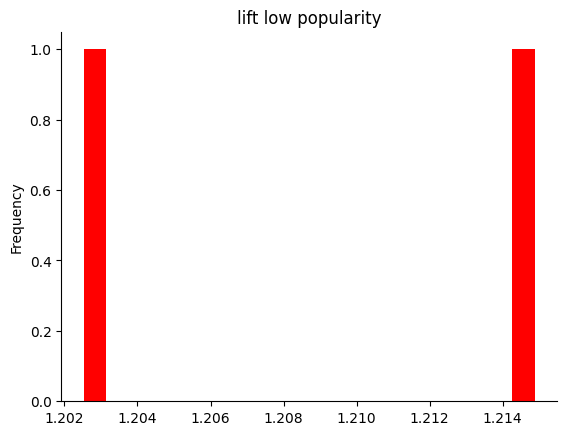

In [350]:
from matplotlib import pyplot as plt
rules_low_pop_conf['lift'].plot(kind='hist', bins=20, title='lift low popularity', color = "red")
plt.gca().spines[['top', 'right',]].set_visible(False)

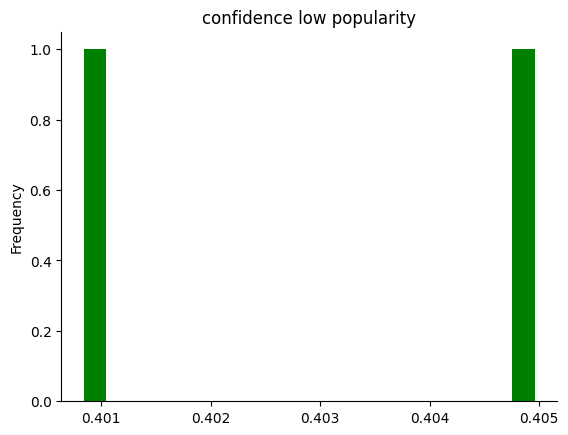

In [351]:
from matplotlib import pyplot as plt
rules_low_pop_conf['confidence'].plot(kind='hist', bins=20, title='confidence low popularity', color = "green")
plt.gca().spines[['top', 'right',]].set_visible(False)

## FP-Growth

In [352]:
from fim import fpgrowth

In [353]:
# supp = 2  # 2%
#supp = 20  # 20%
#zmin = 2  # minimum number of items per item set

itemsets = fpgrowth(X, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

,frequent_itemset,support
0,"(LOW_LOUD (-39.693999999999996, -9.064], LOW_E...",11.231394
1,"(LOW_LOUD (-39.693999999999996, -9.064], LOW_D...",12.810104
2,"(LOW_LOUD (-39.693999999999996, -9.064], LOW_T...",12.584574
3,"(HIGH_ACOU (0.409, 0.996], LOW_ENER (-0.000979...",11.592242
4,"(HIGH_ACOU (0.409, 0.996], LOW_DANC (-0.001, 0...",12.088408
5,"(HIGH_ACOU (0.409, 0.996], LOW_TEMP (-0.001, 1...",11.637348
6,"(HIGH_ACOU (0.409, 0.996], LOW_LOUD (-39.69399...",18.042400
7,"(HIGH_ACOU (0.409, 0.996], LOW_LOUD (-39.69399...",10.464592
8,"(HIGH_ACOU (0.409, 0.996], LOW_LOUD (-39.69399...",11.141182
9,"(HIGH_ACOU (0.409, 0.996], LOW_LOUD (-39.69399...",10.284168


In [354]:

rules = fpgrowth(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)

,consequent,antecedent,abs_support,%_support,confidence,lift
0,"LOW_INST (-0.001, 1.27e-05]","(MID_ENER (0.557, 0.829], LOW_SPEE (-0.001, 0....",121,5.457826,0.433692,1.295815
1,"MID_ENER (0.557, 0.829]","(LOW_INST (-0.001, 1.27e-05], LOW_SPEE (-0.001...",121,5.457826,0.423077,1.265805
2,"LOW_SPEE (-0.001, 0.0406]","(LOW_ENER (-0.0009799000000000001, 0.557], LOW...",129,5.818674,0.470803,1.402917
3,"LOW_ENER (-0.0009799000000000001, 0.557]","(LOW_SPEE (-0.001, 0.0406], LOW_LIVE (0.0168, ...",129,5.818674,0.548936,1.642364
4,"LOW_ENER (-0.0009799000000000001, 0.557]","(LOW_INST (-0.001, 1.27e-05], LOW_SPEE (-0.001...",133,5.999098,0.465035,1.391339
...,...,...,...,...,...,...
2436,"MID_SPEE (0.0406, 0.0687]","(HIGH_ENER (0.829, 1.0], HIGH_VALE (0.575, 0.9...",142,6.405052,0.471761,1.424923
2437,"HIGH_LOUD (-5.856, 0.643]","(MID_SPEE (0.0406, 0.0687], HIGH_ENER (0.829, ...",161,7.262066,0.566901,1.703009
2438,"HIGH_ENER (0.829, 1.0]","(MID_SPEE (0.0406, 0.0687], HIGH_LOUD (-5.856,...",161,7.262066,0.712389,2.148799
2439,"HIGH_LIVE (0.204, 0.994]","(MID_SPEE (0.0406, 0.0687], HIGH_ENER (0.829, ...",122,5.502932,0.429577,1.295746


In [355]:
rules_df[rules_df["consequent"] == "HIGH_POPU (35.0, 94.0]"]

,consequent,antecedent,abs_support,%_support,confidence,lift


In [356]:
rules_df[rules_df["consequent"] == "MID_POPU (18.0, 35.0]"]

,consequent,antecedent,abs_support,%_support,confidence,lift


In [357]:
rules_df[rules_df["consequent"] == "LOW_POPU (-0.001, 18.0]"]

,consequent,antecedent,abs_support,%_support,confidence,lift
